In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('bitcointweets.csv', header=None)
pd.set_option('display.max_colwidth', -1)
df = df[[1,7]]
df.columns = ['tweet','label']
df.head()

<ipython-input-3-de4732a2cca5>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,['neutral']
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,['positive']


In [4]:
cachedStopWords = stopwords.words("english")

def removeStopWords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text

def cleanTweet(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    text = text.lower()
    text = removeStopWords(text)
    text = re.sub('[^A-Za-z0-9 ]+', '',text)
    text = re.sub(' +', ' ',text)
    return text

In [5]:
df['cleaned_tweet'] = df['tweet'].apply(lambda x : cleanTweet(x))

In [6]:
df.head()

,tweet,label,cleaned_tweet
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",['neutral'],paul krugman nobel luddite tweak nose bitcoin enemy says foolish things heres link htt
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,['neutral'],kevinpham sage dum b ss said know nothing bitcoin
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,['positive'],another use case blockchain tipper tippereconomy unseat facebook change everything ico live no
3,free coins https://t.co/DiuoePJdap,['positive'],free coins
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,['positive'],happy announce payvx presale phase 1 live sign gtgt currencies accept


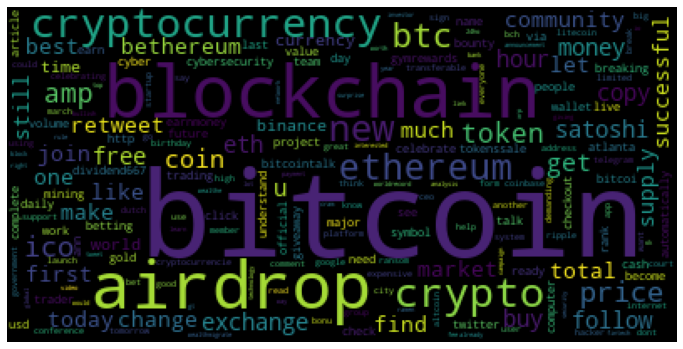

In [7]:
text = df['cleaned_tweet'].to_string().lower()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [9]:
tfidf= TfidfVectorizer(max_features=2000,ngram_range=(1,3)) 

In [10]:
X = tfidf.fit_transform(df['cleaned_tweet'])
y = df['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
###############################################################################################################################

In [16]:
tweets_df = pd.read_csv('E:/SEM-8/Research/Bitcoin_Tweets.csv')

In [17]:
tweets_df = tweets_df[['date','text']]

In [18]:
tweets_df.shape

(6081117, 2)

In [19]:
tweets_df.head()

,date,text
0,1501631940,#bitcoin #bitcoinfork #hardfork #bitcoincash pic.twitter.com/4noehZN7wC
1,1501631940,#bitcoin : Whats going on with the digital currency? #blockchain #digitalcurrency #BTC https:// australianfintech.com.au/bitcoin-whats- goin
2,1501631940,"From the #Bitcoin White Paper: ""We define an electronic coin as a chain of digital signatures."" BTC = ""No"" after #segwit BCC = ""Yes"". http"
3,1501631940,#Bitcoin : What's going on with the #digitalcurrency ? https:// australianfintech.com.au/bitcoin-whats- going-on-with-the-digital-currency/
4,1501631940,Found an app called @SlideCoin that pays #bitcoin on a daily basis. You can download it here: http:// slidecoin.co


In [20]:
cachedStopWords = stopwords.words("english")

def removeStopWords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text
    
def cleanTweet(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/[\s]+','https://',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    text = re.sub(r'pic.twitter\S+','',text)
    text = text.lower()
    text = removeStopWords(text)
    text = re.sub('[^A-Za-z0-9 ]+', '',text)
    text = re.sub(' +', ' ',text)
    return text

In [ ]:
tweets_df['cleaned_text'] = tweets_df['text'].apply(lambda x : cleanTweet(x))

In [18]:
tweets_df.head()

,date,text,cleaned_text
0,1501631940,#bitcoin #bitcoinfork #hardfork #bitcoincash pic.twitter.com/4noehZN7wC,bitcoin bitcoinfork hardfork bitcoincash
1,1501631940,#bitcoin : Whats going on with the digital currency? #blockchain #digitalcurrency #BTC https:// australianfintech.com.au/bitcoin-whats- goin,bitcoin whats going digital currency blockchain digitalcurrency btc goin
2,1501631940,"From the #Bitcoin White Paper: ""We define an electronic coin as a chain of digital signatures."" BTC = ""No"" after #segwit BCC = ""Yes"". http",bitcoin white paper we define electronic coin chain digital signatures btc no segwit bcc yes http
3,1501631940,#Bitcoin : What's going on with the #digitalcurrency ? https:// australianfintech.com.au/bitcoin-whats- going-on-with-the-digital-currency/,bitcoin whats going digitalcurrency goingonwiththedigitalcurrency
4,1501631940,Found an app called @SlideCoin that pays #bitcoin on a daily basis. You can download it here: http:// slidecoin.co,found app called pays bitcoin daily basis download here


In [19]:
def getClassification(x):
    vec = tfidf.transform([x])
    return rfc.predict(vec)[0]

In [108]:
tweets_df2 = tweets_df.iloc[6100000:]

In [109]:
tweets_df2.tail()

,date,text,cleaned_text


In [102]:
tweets_df2['sentiment'] = tweets_df2['cleaned_text'].apply(lambda x : getClassification(x))

<ipython-input-102-c34c076d4601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df2['sentiment'] = tweets_df2['cleaned_text'].apply(lambda x : getClassification(x))


In [37]:
####################################################################################################

In [103]:
tweets_df2.tail(20)

,date,text,cleaned_text,sentiment
6081097,1488240000,Cotizacin del # bitcoin a las 21:00hs Venta: 19625 ARS Compra: 18491 ARS,cotizacin del bitcoin las 2100hs venta 19625 ars compra 18491 ars,['neutral']
6081098,1488240000,Baloncesto. NBA : Milwaukee Bucks 0 X Cleveland Cavaliers 0 http://bit.ly/2mnL4iX # NBA # bitcoin # apuestas,baloncesto nba milwaukee bucks 0 x cleveland cavaliers 0 nba bitcoin apuestas,['neutral']
6081099,1488240000,USA. NBA : Golden State Warriors 0 X Philadelphia 76ers 0 http://bit.ly/2mnIwkF # NBA # bitcoin # apostas,usa nba golden state warriors 0 x philadelphia 76ers 0 nba bitcoin apostas,['neutral']
6081100,1488240000,Done by https://inthebitcoin.com/s/1BM8z4NGXhDuVBLygBb5BJf2s98kCmyPtN # bitcoin # blockchain,done bitcoin blockchain,['neutral']
6081101,1488240000,Bitcoin - BTC Price: $1179.97 Change in 1h: +0.09% Market cap: $19101427518.0 Ranking: 1 # Bitcoin # BTC,bitcoin btc price 117997 change 1h 009 market cap 191014275180 ranking 1 bitcoin btc,['neutral']
6081102,1483565280,What # bitcoin's rising status says about our world http://bv.ms/2j5fP6lpic.twitter.com/99MdwqPp3d,bitcoins rising status says world,['neutral']
6081103,1483574280,What is seen: the LOLs https://www.reddit.com/r/btc/comments/5lzez2/1_btc_64_000_usd_would_be_1_trillion_market_cap/ What is not seen: a # b,seen lols seen b,['neutral']
6081104,1483919640,Wow a must read especially if you're NOT a # gold bug. I wonder what governments would try to do to # Bitcoin to achieve the same results,wow must read especially gold bug wonder governments would try bitcoin achieve results,['positive']
6081105,1484499180,# Bitcoin Someone will create a better more reliable digital currency. We have short memories. Webcrawler Altavista Lycos Yahoo Google,bitcoin someone create better reliable digital currency short memories webcrawler altavista lycos yahoo google,['positive']
6081106,1485387300,# Blockchain Will Eliminate Banks and Democratize Money # fintech # bitcoin # payments # cryptocurrency http://bit.ly/2k5hBsxpic.twitter.com,blockchain eliminate banks democratize money fintech bitcoin payments cryptocurrency,['neutral']


C:\ProgramData\Anaconda3\envs\research-test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

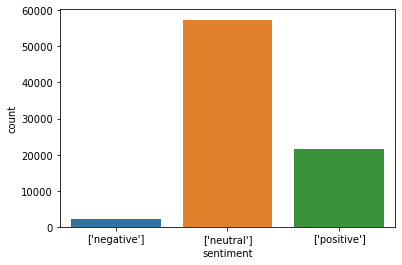

In [104]:
sns.countplot(tweets_df2['sentiment'])

In [105]:
tweets_df2['sentiment'].value_counts()

['neutral']     57382
['positive']    21544
['negative']    2191 
Name: sentiment, dtype: int64

In [106]:
tweets_df2.to_csv("tweets_df63.csv",index=False)